In [51]:
import numpy as np
import pandas as pd

In [52]:
import random

n = 1000

age = [random.randint(1, 100) for i in range(n)]
gender = [random.choice(['male', 'female','trans']) for i in range(n)]

# adding columns using pandas
df = pd.DataFrame(age, columns=['age'])
df['gender'] = gender
df['age_bracket'] = ['young' if i < 30 else 'mid' if i < 50 else 'old' for i in df.age]

df['height'] = [random.random() +  random.choice([1, 1.5]) for i in range(n)]
df['weight'] = [random.normalvariate(50, 7) for i in range(n)]

df.head()

,age,gender,age_bracket,height,weight
0,87,male,old,1.476955,70.211660
1,83,male,old,2.017775,66.263067
2,54,female,old,1.965526,40.676061
3,38,female,mid,1.109934,47.879583
4,16,male,young,1.152258,51.728924


In [53]:
# subset the data
filter_1 = ['age', 'gender']

df[filter_1].head(2)

,age,gender
0,87,male
1,83,male


In [54]:
# using a specific column
filter_2 = df.age_bracket == 'old'

df[filter_2].head(2)

,age,gender,age_bracket,height,weight
0,87,male,old,1.476955,70.211660
1,83,male,old,2.017775,66.263067


In [55]:
# Descriptive analysis
df.describe()



,age,height,weight
count,1000.000000,1000.000000,1000.000000
mean,51.050000,1.754658,49.558138
std,28.444518,0.377247,6.915843
min,1.000000,1.000711,29.552873
25%,27.000000,1.516073,45.041110
50%,50.000000,1.757461,49.414229
75%,76.000000,1.994801,54.002198
max,100.000000,2.499456,73.219280


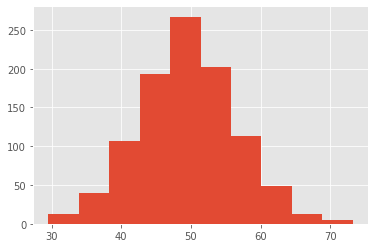

In [56]:
df.weight.hist()

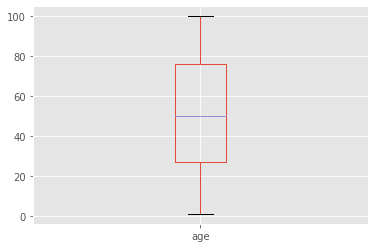

In [57]:
df.plot(y='age', x='age_bracket', kind='box')

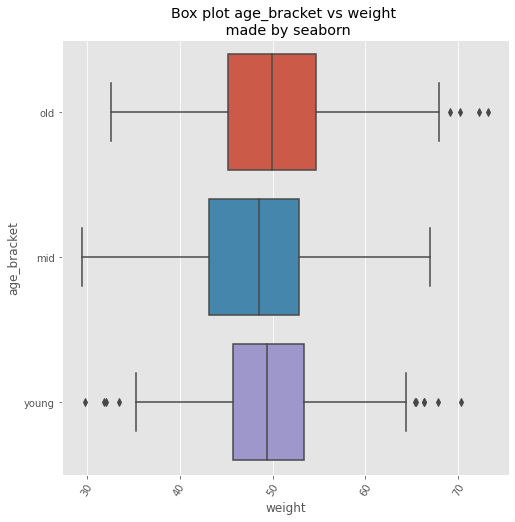

In [58]:
# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.figure(figsize=(8, 8))
sns.boxplot(data= df, y='age_bracket', x='weight')

plt.title('Box plot age_bracket vs weight \n made by seaborn' )
plt.xticks(rotation=60)

plt.show()

In [59]:
# Numpy
weight = [random.normalvariate(50, 7) for i in range(n)]
array = np.array([[age, weight]])

array.shape

(1, 2, 1000)

In [60]:
arr = np.random.randint(0,10, (100, 3))
arr.shape

(100, 3)

In [61]:
dt = pd.DataFrame(arr, columns=['c1', 'c2', 'c3'])
dt.head()

,c1,c2,c3
0,0,3,5
1,0,9,5
2,7,9,4
3,9,5,1
4,9,7,1


In [62]:

dt.iloc[0:2,1:3]

,c2,c3
0,3,5
1,9,5


In [63]:
arr[0:5, 1:3]

array([[3, 5],
       [9, 5],
       [9, 4],
       [5, 1],
       [7, 1]])

In [64]:
#arr[0,0] = np.nan
arr.mean(axis=0)

array([4.71, 4.42, 4.7 ])

In [65]:
# df.mean(axis=0)

In [66]:
# Scikit Learn / Machine Learning

df['BMI'] = df.weight / df.height ** 2
df.head()

,age,gender,age_bracket,height,weight,BMI
0,87,male,old,1.476955,70.211660,32.186574
1,83,male,old,2.017775,66.263067,16.275196
2,54,female,old,1.965526,40.676061,10.528861
3,38,female,mid,1.109934,47.879583,38.864771
4,16,male,young,1.152258,51.728924,38.961362


In [67]:
X = ['height', 'weight']
X = df[X]

Y = df.BMI

In [68]:
# validate model / test model performance
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [69]:
x_train.shape

(800, 2)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [71]:
model.predict(np.array([2,83]).reshape(1, -1))

array([25.805626])

In [72]:
print(83 /4)

20.75


In [73]:
df.shape

(1000, 6)

In [74]:
pred = model.predict(x_test)
pred

array([32.19612949, 16.82262803,  7.06633598, 15.51024556, 10.16197394,
        2.4206072 , 29.3112932 , 21.5528928 , 20.55030285, 20.37293727,
        6.71532581, 25.36157491, 20.28960699, 17.43339641, 16.02813272,
       19.1142826 , 37.73881225, 22.19211167, 26.24331704, 12.58048731,
       17.68843278, 26.0456216 ,  3.01890594,  9.01178642, 17.76883989,
       17.29620766, 34.81916142, 28.38919192, 26.80688052, 23.43552171,
       28.42404871, 25.9600712 , 17.59445995, 11.29938313,  3.02365334,
       25.47481751, 14.96973854, 21.28281382, 16.89218574, 20.01021308,
        5.02884337, 22.23604565, 10.52922706, 24.00491921, 10.59100342,
        9.5614212 , 21.19091885, 34.80566034, 16.17109882, 19.01922315,
       31.24840637, 16.5845677 ,  8.64817339, 23.56815818, 15.90599496,
       21.53701514, 36.07780182, 13.21542724, 19.61811878, 29.01890292,
       36.65743016, 27.48200218, 27.93264931, 33.0620715 ,  4.49658956,
        1.45620363, 19.90224211, 12.41268389, 23.82403586, 13.08

In [75]:
mean = mean_squared_error(pred, y_test)
mean

13.699537443841605